In [1]:
# import libraries

import pandas as pd


import numpy as np

import warnings
warnings.filterwarnings ('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import seaborn as sns

import matplotlib.pyplot as plt

from geopy.geocoders import Nominatim

In [2]:
data_prior2_ori = pd.read_csv('../Proyecto_Arraigo_Recomender_System/data/Urbanitas_prior2.csv')


data_prior2 = data_prior2_ori.copy()

In [3]:
data_prior2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10618 entries, 0 to 10617
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                10618 non-null  int64 
 1   id                        10617 non-null  object
 2   fecha                     10618 non-null  object
 3   pais_de_residencia        10590 non-null  object
 4   provincia_de_espana       10590 non-null  object
 5   ciudad_residencia         10590 non-null  object
 6   situacion_en_espana       10571 non-null  object
 7   profesion                 10515 non-null  object
 8   autonomia_economica       8407 non-null   object
 9   familia_edades            9025 non-null   object
 10  coche_propio              10544 non-null  object
 11  carnet_coche              8924 non-null   object
 12  mascota                   10618 non-null  object
 13  presupuesto_alquiler      10577 non-null  object
 14  primera_segunda_vivien

In [4]:
porcentaje_nulos = data_prior2.isnull().sum() / data_prior2.count() * 100
porcentaje_nulos.sort_values(ascending=False)

autonomia_economica         26.299512
carnet_coche                18.982519
familia_edades              17.650970
profesion                    0.979553
predisposicion_pueblo        0.787850
coche_propio                 0.701821
primera_segunda_vivienda     0.587344
situacion_en_espana          0.444613
presupuesto_alquiler         0.387634
ciudad_residencia            0.264400
provincia_de_espana          0.264400
pais_de_residencia           0.264400
id                           0.009419
fecha                        0.000000
mascota                      0.000000
zona_interes                 0.000000
Unnamed: 0                   0.000000
dtype: float64

LIMPIEZA AUTONOMIA_ECONOMICA

In [5]:
data_prior2.autonomia_economica.unique()

array([nan, '3 meses', '6 meses', '1 año', 'Más de 1 año', '6 ???????',
       'Hasta 12 meses', 'Hasta 3 meses', 'Hasta 6 meses',
       'Más de 12 meses',
       'No dispongo de autonomía económica en estos momentos',
       'Dispongo de capacidad económica regular (jubilado, trabajo a distancia, trabajo fijo...)',
       'Más de 6 meses', '1 ano', '???? ?? ???', '3 ??????', '3 mois'],
      dtype=object)

In [6]:
data_prior2.autonomia_economica.isnull().sum()
#desconocemos la autonomía económica de 2211 personas -> preguntar al cliente

2211

In [7]:
data_prior2 = data_prior2.replace({'autonomia_economica': {  '1 ano': '1 año',
                                                             '6 ???????': '6 meses',
                                                             'Hasta 12 meses' : '1 año',
                                                             'Hasta 3 meses' :'3 meses',
                                                             'Hasta 6 meses' :'6 meses',
                                                             'Más de 12 meses' :'Más de 1 año',
                                                             'No dispongo de autonomía económica en estos momentos' :'3 meses',
                                                             'Dispongo de capacidad económica regular (jubilado, trabajo a distancia, trabajo fijo...)' :'3 meses',
                                                             'Más de 6 meses' :'1 año',
                                                             '3 ??????' :'3 meses',
                                                             '3 mois': '3 meses',

                                                      }})

data_prior2.autonomia_economica.unique()

array([nan, '3 meses', '6 meses', '1 año', 'Más de 1 año', '???? ?? ???'],
      dtype=object)

LIMPIEZA CARNET_COCHE

In [8]:
data_prior2.carnet_coche.unique()

array(['Si', 'No', '???', nan, 'sim', 'Non', '??', 'Não', 'Sim', 'TAk'],
      dtype=object)

In [9]:
#se entiende que si en el momento en que se contestó la pregunta era abierta y no fue respondida como un 'no'

data_prior2.fillna({'carnet_coche':'No'}, inplace=True)


In [10]:
data_prior2 = data_prior2.replace({'carnet_coche': {'sim': 'Si',
                                                    'Não': 'No',
                                                    'Non' : 'No',
                                                    'TAk' :'Si',
                                                    'Tak' :'Si',
                                                     'Sim' :'Si',
                                                     '???' :'Si',
                                                     '??' :'No',
                                                      }})

#los replacements de las ??? (cirílico) se han deducido por los datos del csv

In [11]:
data_prior2.carnet_coche.unique()

array(['Si', 'No'], dtype=object)

LIMPIEZA COCHE_PROPIO

In [12]:
data_prior2.coche_propio.unique()

array(['No', 'Si', '???', nan, 'Sí', 'sí', 'sim', 'Non', '??', 'Sim',
       'TAk', 'Não', 'NIE'], dtype=object)

In [13]:
#se entiende que si en el momento en que se contestó la pregunta era abierta y no fue respondida como un 'no'

data_prior2.fillna({'coche_propio':'No'}, inplace=True)

In [14]:
data_prior2 = data_prior2.replace({'coche_propio': {'sim': 'Si',
                                                    'Não': 'No',
                                                    'Non' : 'No',
                                                    'TAk' :'Si',
                                                     'Sim' :'Si',
                                                     '???' :'Si',
                                                     '??' :'No',
                                                     'NIE' :'No',
                                                     'Sí' :'Si',
                                                     'sí' :'Si',
                                                      }})

In [15]:
data_prior2.coche_propio.unique()

array(['No', 'Si'], dtype=object)

LIMPIEZA PREDISPOSICION_PUEBLO

In [16]:
data_prior2.predisposicion_pueblo.unique()

array([nan, '3 meses', 'Aún me lo estoy pensando', '6 meses', '1 mes',
       '1 ?????', 'Más de 6 meses', 'En los próximos 6 meses',
       'Cuanto antes (hasta 3 meses)', 'En los proximos 6 meses',
       'Cuanto antes  (hasta 3 meses)', 'Hasta 6 meses',
       'En el próximo mes', 'Cuanto antes',
       'Cuando termine nuestro contrato con el actual inmueble. A partir de tres años.',
       'Necesito pensarlo más', '1 mês', '??? ????', '1 mois',
       'Ciagle o tym mysle'], dtype=object)

In [17]:
data_prior2.predisposicion_pueblo.isnull().sum()
#desconocemos la predisposición a mudarse a un pueblo de 83 personas -> como el cuestionario estaba abierto en su momento, damos por hecho que no lo tenían claro.

83

In [18]:
data_prior2 = data_prior2.replace({'predisposicion_pueblo': {'1 ?????': '1 mes',
                                                             'Más de 6 meses': '6 meses',
                                                             'En los próximos 6 meses' : 'Aún me lo estoy pensando',
                                                             'Cuanto antes (hasta 3 meses)' :'3 meses',
                                                             'Cuanto antes  (hasta 3 meses)' :'3 meses',
                                                             'Hasta 6 meses' :'6 meses',
                                                             'En el próximo mes' :'Aún me lo estoy pensando',
                                                             'Cuanto antes' :'Aún me lo estoy pensando',
                                                             'Cuando termine nuestro contrato con el actual inmueble. A partir de tres años.' :'Aún me lo estoy pensando',
                                                             'ecesito pensarlo más' :'Aún me lo estoy pensando',
                                                             '1 mês': '1 mes',
                                                             '??? ????' :'Aún me lo estoy pensando',
                                                             'Ciagle o tym mysle' :'Aún me lo estoy pensando',
                                                             '1 mois': '1 mes',
                                                             'Necesito pensarlo más' :'Aún me lo estoy pensando',
                                                             'En los proximos 6 meses' : 'Aún me lo estoy pensando',
                                                      }})

data_prior2.predisposicion_pueblo.unique()

array([nan, '3 meses', 'Aún me lo estoy pensando', '6 meses', '1 mes'],
      dtype=object)

In [19]:
data_prior2.fillna({'predisposicion_pueblo':'Aún me lo estoy pensando'}, inplace=True)

LIMPIEZA ID

In [20]:
data_prior2.fillna({'id':'U-000002'}, inplace=True) #tenemos identificado el id que faltaba

In [21]:
porcentaje_nulos = data_prior2.isnull().sum() / data_prior2.count() * 100
porcentaje_nulos.sort_values(ascending=False) 

autonomia_economica         26.299512
familia_edades              17.650970
profesion                    0.979553
primera_segunda_vivienda     0.587344
situacion_en_espana          0.444613
presupuesto_alquiler         0.387634
pais_de_residencia           0.264400
provincia_de_espana          0.264400
ciudad_residencia            0.264400
mascota                      0.000000
zona_interes                 0.000000
Unnamed: 0                   0.000000
carnet_coche                 0.000000
coche_propio                 0.000000
id                           0.000000
fecha                        0.000000
predisposicion_pueblo        0.000000
dtype: float64

LIMPIEZA FAMILIA_EDADES

In [22]:
data_prior2.familia_edades.unique()

array(['30 - 24 - 2', '37,37', '57, 56', ..., '37-28-13-7-4',
       '35, 33, 10, 8, 5, 3', '41, 32 y 6 meses'], dtype=object)

In [23]:
import re

data_prior2['familia_edades'] = data_prior2['familia_edades'].apply(lambda x: ','.join(re.findall(r'\d+', str(x))))


In [24]:
data_prior2.familia_edades.unique()

array(['30,24,2', '37,37', '57,56', ..., '37,28,13,7,4', '35,33,10,8,5,3',
       '41,32,6'], dtype=object)

In [25]:
familias_1 = data_prior2[data_prior2['familia_edades'].str.len() == 1]['familia_edades'].tolist()

In [26]:
familias_1[:10], data_prior2.familia_edades.isnull().sum() #hay gente que ha contestado que tiene cero años

(['0', '4', '0', '0', '0', '0', '0', '6', '3', '9'], 0)

In [27]:
data_prior2.familia_edades.value_counts()[:10]

      1654
0      235
30      83
25      65
31      61
32      59
27      59
28      58
45      56
34      55
Name: familia_edades, dtype: int64

In [28]:
data_prior2['numero_familiares'] = data_prior2['familia_edades'].apply(lambda x: len(x.split(',')))


In [29]:
data_prior2.numero_familiares.value_counts()

1     3907
2     2417
3     1798
4     1434
5      655
6      233
7       96
8       42
9       14
10       9
12       5
16       3
15       2
19       1
13       1
11       1
Name: numero_familiares, dtype: int64

LIMPIEZA PRIMERA_SEGUNDA_VIVIENDA 

In [30]:
data_prior2.primera_segunda_vivienda.unique()

array([nan, 'Primera residencia', 'Segunda residencia',
       '?????? ??????????', 'Primeira residência', '??????? ??????',
       'première résidence', 'primeira residência', 'pierwsza rezydencja',
       'pierwsze miejsce zamieszkania'], dtype=object)

In [31]:
data_prior2.primera_segunda_vivienda.isnull().sum()

#62 personas no han marcado si la casa de destino es para primera o segunda vivienda.

62

In [32]:
data_prior2 = data_prior2.replace({'primera_segunda_vivienda': {'Primeira residência': 'Primera residencia',
                                                             'Primeira residência': 'Primera residencia',
                                                             'première résidence' : 'Primera residencia',
                                                             'primeira residência' :'Primera residencia',
                                                             'pierwsza rezydencja' :'Primera residencia',
                                                             'pierwsze miejsce zamieszkania' :'Primera residencia',
                                                             '?????? ??????????' :'Primera residencia', #esto lo sé porque es ucraniano
                                                             '??????? ??????' :'Primera residencia',

                                                      }})

data_prior2.primera_segunda_vivienda.unique()

array([nan, 'Primera residencia', 'Segunda residencia'], dtype=object)

LIMPIEZA SITUACION_EN_ESPAÑA

In [33]:
data_prior2.situacion_en_espana.unique()

array(['Tengo nacionalidad española / de un país de la UE / permiso de residencia',
       'No estoy en ninguna de esas situaciones',
       '? ?? ???????? ?? ? ????? ?? ???? ????????',
       'Soy español o tengo la nacionalidad española/europea',
       'No estoy en ninguna de estas situaciones',
       'Tengo permiso de residencia en España',
       'Situación de protección de asilo', nan,
       'Soy español o tengo nacionalidad española/ europea',
       'Situación de protección internacional o asilo',
       'Autorización de permanencia en España por estudios',
       'Otro tipo de visado (Visado de Residencia para Emprendedores o Actividad Empresarial (REM), Visado de Residencia para Inversores de Capital (RIC), Visado de Residencia por Adquisición de Bienes Inmuebles (RIV), Visado de Residencia para Profesionales Altamente Cualificados (TAC), Visado de Residencia para Formación o Investigación (RIN), Visado de Residencia por Traslado Empresarial (TTI))',
       'Sin respuesta',

In [34]:
data_prior2.situacion_en_espana.isnull().sum()

#47 personas no informaron sobre su situación en España


47

In [35]:
data_prior2 = data_prior2.replace({'situacion_en_espana': {'? ?? ???????? ?? ? ????? ?? ???? ????????': 'No estoy en ninguna de esas situaciones',
                                                             'Soy español o tengo la nacionalidad española/europea': 'Tengo nacionalidad española / de un país de la UE / permiso de residencia',
                                                             'No estoy en ninguna de estas situaciones' : 'No estoy en ninguna de esas situaciones',
                                                             'Tengo permiso de residencia en España' :'Tengo nacionalidad española / de un país de la UE / permiso de residencia',
                                                             'Situación de protección de asilo' :'Tengo nacionalidad española / de un país de la UE / permiso de residencia',
                                                             'Soy español o tengo nacionalidad española/ europea' :'Tengo nacionalidad española / de un país de la UE / permiso de residencia',
                                                             'Situación de protección internacional o asilo' :'Tengo nacionalidad española / de un país de la UE / permiso de residencia', #esto lo sé porque es ucraniano
                                                             'Autorización de permanencia en España por estudios' :'Tengo nacionalidad española / de un país de la UE / permiso de residencia',
                                                             'Otro tipo de visado (Visado de Residencia para Emprendedores o Actividad Empresarial (REM), Visado de Residencia para Inversores de Capital (RIC), Visado de Residencia por Adquisición de Bienes Inmuebles (RIV), Visado de Residencia para Profesionales Altamente Cualificados (TAC), Visado de Residencia para Formación o Investigación (RIN), Visado de Residencia por Traslado Empresarial (TTI))' :'Tengo nacionalidad española / de un país de la UE / permiso de residencia',
                                                             'Permiso de residencia/ trabajo (Asilo)' :'Tengo nacionalidad española / de un país de la UE / permiso de residencia',
                                                             'En tramite (de aqui a 6 meses)' :'No estoy en ninguna de esas situaciones',
                                                             'En tramite (de aqui a 6 meses)' :'No estoy en ninguna de esas situaciones',
                                                             'Otro tipo de visado (Para emprendedores o Actividad empresarial)':'Tengo nacionalidad española / de un país de la UE / permiso de residencia',
                                                             'Eu não estou em nenhuma dessas situações':'No estoy en ninguna de esas situaciones',
                                                             'Tenho nacionalidade espanhola / de um país da UE / autorização de residência':'Tengo nacionalidad española / de un país de la UE / permiso de residencia',
                                                             '??? ??? ?? ?? ?? ??? ???????': 'No estoy en ninguna de esas situaciones',
                                                             "J'ai la nationalité espagnole / d'un pays de l'UE / un permis de séjour":'Tengo nacionalidad española / de un país de la UE / permiso de residencia',
                                                             '? ???? ???? ????????? ??????????? / ?? ?????? ?? / ??? ?? ??????????':'Tengo nacionalidad española / de un país de la UE / permiso de residencia',
                                                             '? ?? ? ????? ?? ???? ????????':'No estoy en ninguna de esas situaciones',
                                                             'Mam obywatelstwo hiszpanskie / z kraju UE / pozwolenie na pobyt': 'Tengo nacionalidad española / de un país de la UE / permiso de residencia',
                                                             'Mam obywatelstwo hiszpanskie / z kraju UE / zezwolenie na pobyt': 'Tengo nacionalidad española / de un país de la UE / permiso de residencia',
                                                              'Sí':'Tengo nacionalidad española / de un país de la UE / permiso de residencia',
                                                             
                                                             
                                                             
                                                             
                                                             
                                                             
                                                             
                                                             

                                                      }})

data_prior2.situacion_en_espana.unique()

array(['Tengo nacionalidad española / de un país de la UE / permiso de residencia',
       'No estoy en ninguna de esas situaciones', nan, 'Sin respuesta'],
      dtype=object)

In [36]:
situacion_check = data_prior2.query("situacion_en_espana == 'Sin respuesta'")['pais_de_residencia'].value_counts()

In [37]:
#Como son países de la UE o España, reemplazamos por 'Tengo nacionalidad española / de un país de la UE / permiso de residencia'

data_prior2.loc[(data_prior2['situacion_en_espana'] == 'Sin respuesta') & (data_prior2['pais_de_residencia'].str.contains('España', case=False, regex=False)), 'situacion_en_espana'] = 'Tengo nacionalidad española / de un país de la UE / permiso de residencia'
data_prior2.loc[(data_prior2['situacion_en_espana'] == 'Sin respuesta') & (data_prior2['pais_de_residencia'].str.contains('Italia', case=False, regex=False)), 'situacion_en_espana'] = 'Tengo nacionalidad española / de un país de la UE / permiso de residencia'
data_prior2.loc[(data_prior2['situacion_en_espana'] == 'Sin respuesta') & (data_prior2['pais_de_residencia'].str.contains('France', case=False, regex=False)), 'situacion_en_espana'] = 'Tengo nacionalidad española / de un país de la UE / permiso de residencia'
data_prior2.loc[(data_prior2['situacion_en_espana'] == 'Sin respuesta') & (data_prior2['pais_de_residencia'].str.contains('Deutschland', case=False, regex=False)), 'situacion_en_espana'] = 'Tengo nacionalidad española / de un país de la UE / permiso de residencia'


In [38]:
#En este caso, como no son países que pertenezcan a la UE y no han respondido, damos por hecho que se encuentran en otra situación

data_prior2.loc[(data_prior2['situacion_en_espana'] == 'Sin respuesta') & (data_prior2['pais_de_residencia'].str.contains('Argentina', case=False, regex=False)), 'situacion_en_espana'] = 'No estoy en ninguna de esas situaciones'
data_prior2.loc[(data_prior2['situacion_en_espana'] == 'Sin respuesta') & (data_prior2['pais_de_residencia'].str.contains('Honduras', case=False, regex=False)), 'situacion_en_espana'] = 'No estoy en ninguna de esas situaciones'
data_prior2.loc[(data_prior2['situacion_en_espana'] == 'Sin respuesta') & (data_prior2['pais_de_residencia'].str.contains('México', case=False, regex=False)), 'situacion_en_espana'] = 'No estoy en ninguna de esas situaciones'
data_prior2.loc[(data_prior2['situacion_en_espana'] == 'Sin respuesta') & (data_prior2['pais_de_residencia'].str.contains('Colombia', case=False, regex=False)), 'situacion_en_espana'] = 'No estoy en ninguna de esas situaciones'



In [39]:
#Check personas sin respuesta

data_prior2.query("situacion_en_espana == 'Sin respuesta'")['pais_de_residencia'].value_counts()

Series([], Name: pais_de_residencia, dtype: int64)

In [40]:
data_prior2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10618 entries, 0 to 10617
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                10618 non-null  int64 
 1   id                        10618 non-null  object
 2   fecha                     10618 non-null  object
 3   pais_de_residencia        10590 non-null  object
 4   provincia_de_espana       10590 non-null  object
 5   ciudad_residencia         10590 non-null  object
 6   situacion_en_espana       10571 non-null  object
 7   profesion                 10515 non-null  object
 8   autonomia_economica       8407 non-null   object
 9   familia_edades            10618 non-null  object
 10  coche_propio              10618 non-null  object
 11  carnet_coche              10618 non-null  object
 12  mascota                   10618 non-null  object
 13  presupuesto_alquiler      10577 non-null  object
 14  primera_segunda_vivien

In [41]:
porcentaje_nulos = data_prior2.isnull().sum() / data_prior2.count() * 100
porcentaje_nulos.sort_values(ascending=False)

autonomia_economica         26.299512
profesion                    0.979553
primera_segunda_vivienda     0.587344
situacion_en_espana          0.444613
presupuesto_alquiler         0.387634
pais_de_residencia           0.264400
provincia_de_espana          0.264400
ciudad_residencia            0.264400
Unnamed: 0                   0.000000
mascota                      0.000000
predisposicion_pueblo        0.000000
zona_interes                 0.000000
familia_edades               0.000000
carnet_coche                 0.000000
coche_propio                 0.000000
id                           0.000000
fecha                        0.000000
numero_familiares            0.000000
dtype: float64

In [42]:
data_prior2.head(1)

,Unnamed: 0,id,fecha,pais_de_residencia,provincia_de_espana,ciudad_residencia,situacion_en_espana,profesion,autonomia_economica,familia_edades,coche_propio,carnet_coche,mascota,presupuesto_alquiler,primera_segunda_vivienda,zona_interes,predisposicion_pueblo,numero_familiares
0,0,U-000002,2023-03-01,España,Cantabria,Santander,Tengo nacionalidad española / de un país de la...,Atención al cliente,NaN,"30,24,2",No,Si,No,NaN,NaN,Indiferente,Aún me lo estoy pensando,3


In [43]:
data_prior2 = data_prior2.drop("Unnamed: 0", axis=1)

In [44]:
data_prior2.head(1)

,id,fecha,pais_de_residencia,provincia_de_espana,ciudad_residencia,situacion_en_espana,profesion,autonomia_economica,familia_edades,coche_propio,carnet_coche,mascota,presupuesto_alquiler,primera_segunda_vivienda,zona_interes,predisposicion_pueblo,numero_familiares
0,U-000002,2023-03-01,España,Cantabria,Santander,Tengo nacionalidad española / de un país de la...,Atención al cliente,NaN,"30,24,2",No,Si,No,NaN,NaN,Indiferente,Aún me lo estoy pensando,3


LIMPIEZA COLUMNA PROFESION

In [45]:
data_prior2.profesion.unique()


array(['Atención al cliente', 'Comercio internacional', 'Dependiente',
       'Sanitario', 'Fotógrafo', 'Profesor educación especial',
       'Técnico de empresas y actividades turísticas', 'Otro', 'Cocinero',
       'Administrativo', 'Empresario', 'Gestor cultural', 'Albañil',
       'Camarero', 'Mozo almacén', 'Diseñador grafico', 'Autónomo',
       'Graduado social', 'Abogado', 'Pensionista', 'Hostelero',
       'Artes visuales', 'Conductor', 'Ganadero', 'Freelance digital',
       'Funcionario', 'Maestro de Educación Primaria', 'Ingeniero',
       'Electricista', 'Esteticista', 'Profesor', 'Informático',
       'Auxiliar', 'Técnico', 'Panadero', 'Geólogo', 'Pastelero',
       'Trabajo de campo', 'Peluquería', 'Logística de transportes',
       'Médico Especialista', '?????', 'Carnicero', 'Recepcionista',
       'Periodista', 'Biólogo ambiental', 'Limpieza',
       'Marketing y publicidad', 'Operario', 'Comercial', 'Jubilado',
       'Empleado del hogar', 'Dietista/ Nutricionista', 

In [46]:
profesiones = {
  "sector_servicios": ["Optometrista", "Compositor","Inspector ITV", "Masajista", "Músico, productor vídeos","Homeópata",  "Suscriptor de seguros", "historia del arte","Asesor fiscal", "Joyero", "Maquetadora", "Formador", "Celador","Piloto de avión","Informático",  "Ingeniero de Telecomunicación.", "Distribución de cine","Titiritero", "Gestor administrativo", "Coordinador", "Seguridad","Mentora", "Coordinador de redes","Operador", "Pedicuro", "cuidar dos idosos","Recursos Humanos",  "Vigilante","Decorador", "Mantenimiento", "Trabajador social","Asesor", "Veterinario","Jardinero",  "Enfermero", "Maestro","Empleado del hogar", "Dietista/ Nutricionista", "Documentalista", "Economista","Marketing y publicidad", "Comercial","Peluquería", "Pastelero","Esteticista","Dependiente",  "Recepcionista","Técnico de empresas y actividades turísticas", "Agente de viajes","Camarero","Médico Especialista", "Enfermero", "Dentista", "Matrona", "Farmacéutico", "Logopeda", "Fisioterapeuta", "Cocinero", "Hostelero","Fotógrafo", "Diseñador grafico", "Pintor", "Artista plástico Escultor","Profesor educación especial", "Maestro de Educación Primaria", "Profesor de Universidad", "Personal de Educación Infantil","Empresario", "Gestor cultural", "Graduado social", "Abogado", "Conductor", "Freelance digital","Bezpieczenstwo"],
  "sector_industria": ["Mecánico","Técnico", "Ingeniero", "Ingeniero Industrial", "Logística de transportes", "Ferroviario"],
  "sector_construccion": ["Arquitecto","Albañil", "Electricista", "Carpintero Aluminio", "Fontanero", "Operario","Ingeniero de Edificación.", "Técnico de Prevención"],
  "sector_agricultura_ganaderia_pesca": ["Ganadero", "Ingeniero Técnico Agrícola","Apicultor","TÉCNICO SUPERIOR EN SALUD AMBIENTAL","Capitan Mercante","Pastor"],
  "sector_otros": [  "Pensionista", "Funcionario", "Geólogo",  "Trabajo de campo", "Jubilado", "Bombero forestal",  "Militar",  "Estudiante", "Investigador",  "Policia", "Desempleado",  "Diplomado", "De outros", "Kierownik", "Koordynator", "?????? ?????????", "Travail de champ", "??????", "?????", "????", "????????", "???????? ?????"]}


In [47]:
def verificar_profesion(fila, sector):
    profesion = fila['profesion']
    if profesion in profesiones[sector]:
        return 1
    else:
        return 0




In [48]:
for sector in profesiones.keys():
    data_prior2[f'{sector}'] = data_prior2.apply(verificar_profesion, args=(sector,), axis=1)


In [49]:
data_prior2.head()

,id,fecha,pais_de_residencia,provincia_de_espana,ciudad_residencia,situacion_en_espana,profesion,autonomia_economica,familia_edades,coche_propio,carnet_coche,mascota,presupuesto_alquiler,primera_segunda_vivienda,zona_interes,predisposicion_pueblo,numero_familiares,sector_servicios,sector_industria,sector_construccion,sector_agricultura_ganaderia_pesca,sector_otros
0,U-000002,2023-03-01,España,Cantabria,Santander,Tengo nacionalidad española / de un país de la...,Atención al cliente,NaN,"30,24,2",No,Si,No,NaN,NaN,Indiferente,Aún me lo estoy pensando,3,0,0,0,0,0
1,U-000002,2020-10-26,"('España', 'Andalucía')","('España', 'Andalucía')",Algeciras,Tengo nacionalidad española / de un país de la...,Comercio internacional,3 meses,"37,37",Si,Si,No,Hasta 300€,Primera residencia,Pueblos de Zaragoza,3 meses,2,0,0,0,0,0
2,U-000003,2020-10-26,"('España', 'Comunidad de Madrid')","('España', 'Comunidad de Madrid')",Colmenar Viejo (Madrid),Tengo nacionalidad española / de un país de la...,Dependiente,NaN,"57,56",Si,Si,Si,Hasta 450€,Segunda residencia,Sierra norte de Madrid,Aún me lo estoy pensando,2,1,0,0,0,0
3,U-000006,2020-11-08,"('España', '28830')","('España', '28830')",San Fernando de Henares,Tengo nacionalidad española / de un país de la...,Sanitario,NaN,"38,38,8",Si,Si,Si,Hasta 450€,Primera residencia,Sierra norte de Madrid,3 meses,3,0,0,0,0,0
4,U-000007,2020-11-11,"('España', 'Comunidad de Madrid')","('España', 'Comunidad de Madrid')",Madrid,Tengo nacionalidad española / de un país de la...,Fotógrafo,6 meses,"41,31",Si,Si,Si,Hasta 450€,Primera residencia,Sierra norte de Madrid,6 meses,2,1,0,0,0,0


LIMPIEZA COLUMNA PRESUPUESTO_ALQUILER

In [50]:
data_prior2.presupuesto_alquiler.unique()

array([nan, 'Hasta 300€', 'Hasta 450€', 'Hasta 600€', '?? 300 ????',
       'Más de 600€', 'Hasta 600', 'Hasta 450', 'Hasta 300', 'Más de 600',
       'hasta 600', 'hasta 450', 'hasta 300', 'Compra', 'Até € 300',
       'Até € 600', '?? ??? ??? 300 ????', "Jusqu'à 300 €", 'Até 600€',
       'Até 300€', 'Do 450€', 'Do 300 €'], dtype=object)

In [51]:
data_prior2 = data_prior2.replace({'presupuesto_alquiler': {'?? 300 ????': 'Hasta 300€',
                                                             'Hasta 600': 'Hasta 600€',
                                                             'Hasta 450' : 'Hasta 450€',
                                                             'Hasta 300' :'Hasta 300€',
                                                             'Más de 600' :'Más de 600€',
                                                             'hasta 450' :'Hasta 450€',
                                                             'hasta 300' :'Hasta 300€',
                                                             'Até € 300' :'Hasta 300€',
                                                             'Compra' :'Más de 600€',
                                                             'Até € 600' :'Hasta 600€',
                                                             '?? ??? ??? 300 ????': 'Hasta 300€',
                                                             "Jusqu'à 300 €" :'Hasta 300€',
                                                             'Até 600€' :'Hasta 600€',
                                                             'Até 300€': 'Hasta 300€',
                                                             'Do 450€' :'Hasta 450€',
                                                             'Do 300 €' : 'Hasta 300€',
                                                            'hasta 600': 'Hasta 600€',
                                                      }})

data_prior2.presupuesto_alquiler.unique()

array([nan, 'Hasta 300€', 'Hasta 450€', 'Hasta 600€', 'Más de 600€'],
      dtype=object)

In [52]:
data_prior2.presupuesto_alquiler.isnull().sum()

#desconocemos el presupuesto de alquiler de 41 personas

41

LIMPIEZA COLUMNA PAIS_RESIDENCIA

In [53]:
data_prior2.pais_de_residencia.unique()[:10]

array(['España', "('España', 'Andalucía')",
       "('España', 'Comunidad de Madrid')", "('España', '28830')",
       "('España', '46133')", "('Cuba', 'NINGUNA')",
       "('España', 'Illes Balears')", "('United States', 'NINGUNA')",
       "('Россия', 'NINGUNA')", "('España', '31500')"], dtype=object)

In [54]:
data_prior2['pais_de_residencia'] = data_prior2['pais_de_residencia'] .apply(lambda x: str(x))

In [55]:
data_prior2['pais_de_residencia'] = ['España' if isinstance(valor, str) and 'España' in valor else valor for valor in data_prior2['pais_de_residencia']]


In [56]:
import regex

paises_ue = ['France', 'Italia', 'Deutschland', 'België / Belgique / Belgien', 'Portugal', 'Nederland', 'Andorra', 'Norge', 'România', 'Slovensko', 'Česko', 'Polska']
paises_ue_regex = [regex.escape(pais) for pais in paises_ue]

data_prior2['pais_de_residencia'] = ['Resto de Europa (dentro de UE)' if any(regex.search(pais, valor) for pais in paises_ue_regex) else valor for valor in data_prior2['pais_de_residencia']]



In [57]:
paises_latam = ['Cuba', 'México', 'Argentina', 'Bolivia', 'Venezuela', 'Colombia', 'Chile', 'Paraguay / Paraguái', 'Panamá', 'Perú', 'Costa Rica', 'Ecuador', 'Brasil', 'República Dominicana', 'Honduras', 'Uruguay','Nicaragua','El Salvador']

paises_latam_regex = [regex.escape(pais) for pais in paises_latam]

data_prior2['pais_de_residencia'] = ['Latino América' if any(regex.search(pais, valor) for pais in paises_latam_regex) else valor for valor in data_prior2['pais_de_residencia']]

In [58]:
paises_otro = ['United States', 'Россия', 'United Kingdom', '臺灣', 'الأردن', 'Ascension and Tristan da Cunha', 'Magyarország', 'Éire / Ireland', 'Lëtzebuerg', 'Australia', 'Canada', 'سوريا', 'Philippines', 'Schweiz/Suisse/Svizzera/Svizra', 'Algérie / ⵍⵣⵣⴰⵢⴻⵔ / الجزائر', '???????','??????','Ελλάς']

paises_otro_regex = [regex.escape(pais) for pais in paises_otro]

data_prior2['pais_de_residencia'] = ['Otro' if any(regex.search(pais, valor) for pais in paises_otro_regex) else valor for valor in data_prior2['pais_de_residencia']]

In [59]:
data_prior2.pais_de_residencia.unique()

array(['España', 'Latino América', 'Otro',
       'Resto de Europa (dentro de UE)', 'nan'], dtype=object)

In [60]:
data_prior2.pais_de_residencia.isnull().sum()


0

In [61]:
data_prior2.pais_de_residencia.value_counts()

España                            8059
Latino América                    1977
Otro                               361
Resto de Europa (dentro de UE)     193
nan                                 28
Name: pais_de_residencia, dtype: int64

LIMPIEZA COLUMNA PROVINCIA_ESPANA

In [62]:
data_prior2.provincia_de_espana.unique()[:10]



array(['Cantabria', "('España', 'Andalucía')",
       "('España', 'Comunidad de Madrid')", "('España', '28830')",
       "('España', '46133')", "('Cuba', 'NINGUNA')", 'Madrid',
       "('España', 'Illes Balears')", "('United States', 'NINGUNA')",
       "('Россия', 'NINGUNA')"], dtype=object)

In [63]:
def actualizar_provincia(row):
    if row['pais_de_residencia'] == 'España':
        return row['provincia_de_espana']
    else:
        return 'Ninguna'




In [64]:
data_prior2['provincia_de_espana'] = data_prior2.apply(lambda row: actualizar_provincia(row), axis=1)

In [65]:
data_prior2.provincia_de_espana.value_counts()[:10]

Ninguna                               2619
Madrid                                1900
('España', 'Comunidad de Madrid')     1139
Barcelona                              445
Valencia                               260
('España', 'Andalucía')                243
Alicante                               235
('España', 'Comunitat Valenciana')     212
Málaga                                 154
('España', '08001')                    142
Name: provincia_de_espana, dtype: int64

In [66]:
#from geopy.geocoders import Nominatim

#geolocator = Nominatim(user_agent="my-app")

In [67]:
data_prior2['provincia_de_espana'] = data_prior2['provincia_de_espana'] .apply(lambda x: str(x))

In [68]:
data_prior2['provincia_de_espana'] = data_prior2['provincia_de_espana'].str.replace('(','').str.replace(')','').str.replace('""','').str.replace(',','').str.replace('España','').str.replace("''",'').str.replace("NINGUNA",'Ninguna').str.strip()



In [69]:
data_prior2['provincia_de_espana'].unique()

array(['Cantabria', "'Andalucía'", "'Comunidad de Madrid'", "'28830'",
       "'46133'", 'Ninguna', 'Madrid', "'Illes Balears'", "'31500'",
       "'Comunitat Valenciana'", "'36960'", "'08001'", "'45210'",
       "'03830'", "'Canarias'", "'08500'", "'Aragón'", "'08330'",
       "'Extremadura'", "'Euskadi'", "'28970'", "'Catalunya'",
       "'Castilla y León'", "'08410'", "'Galicia'", "'28411'", "'08232'",
       "'48620'", "'41710'", "'30890'", "'11370'", "'Castilla-La Mancha'",
       "'08221'", "'Cantabria'", "'Región de Murcia'",
       "'Navarra - Nafarroa'", "'08389'", 'Valencia', "'43001'",
       "'45910'", "'07687'", "'08100'", "'43840'", "'48230'", "'08210'",
       "'08350'", "'28760'", "'45217'", "'28189'", "'30510'", "'28723'",
       "'41500'", "'La Rioja'", "'08570'", "'14900'", "'28500'",
       "'15670'", "'46870'", "'13400'", "'17600'", "'28320'", "'08380'",
       "'08291'", "'02640'", "'45200'", "'11300'", "'41580'", "'12190'",
       "'03440'", "'46792'", "'30006'",

In [70]:
prov_cp={'A Coruña':'15xxx',
         'Albacete':'02xxx',
         'Alicante':'03xxx',
         'Almería':'04xxx',
         'Álava':'01xxx',
         'Asturias':'33xxx',
         'Ávila':'05xxx',
         'Badajoz':'06xxx',
         'Barcelona':'08xxx',
         'Bizkaia':'48xxx',
         'Burgos':'09xxx',
         'Cáceres':'10xxx',
         'Cádiz':'11xxx',
         'Cantabria':'39xxx',
         'Castellón':'12xxx',
         'Ceuta':'52xxx',
         'Ciudad Real':'13xxx',
         'Comunidad de Madrid':'28xxx',
         'Córdoba':'14xxx',
         'Cuenca':'26xxx',
         'Gipuzkoa':'20xxx',
         'Girona':'17xxx',
         'Granada':'18xxx',
         'Guadalajara':'19xxx',
         'Huelva':'21xxx',
         'Huesca':'22xxx',
         'Illes Balears':'07xxx',
         'Jaén':'23xxx',
         'La Rioja':'26xxx',
         'Las Palmas':'35xxx',
         'León':'24xxx',
         'Lleida':'25xxx',
         'Lugo':'27xxx',
         'Málaga':'29xxx',
         'Melilla':'51xxx',
         'Navarra':'31xxx',
         'Ourense':'32xxx',
         'Palencia':'34xxx',
         'Pontevedra':'36xxx',
         'Murcia':'30xxx',
         'Salamanca':'37xxx',
         'Santa Cruz de Tenerife':'38xxx',
         'Segovia':'40xxx',
         'Sevilla':'41xxx',         
         'Soria':'42xxx',
         'Tarragona':'43xxx',
         'Teruel':'44xxx',
         'Toledo':'45xxx',
         'Valencia':'46xxx',
         'Valladolid':'47xxx',
         'Zamora':'49xxx',
         'Zaragoza':'50xxx',
         
        }

data_prior2['provincia_de_espana'] = data_prior2['provincia_de_espana'].str.replace("'", "")



In [71]:
for i in range(len(data_prior2)):
    # Obtener los primeros dos caracteres de la cadena en la columna 'provincia_de_espana'
    column_value_prefix = data_prior2.at[i, 'provincia_de_espana'][:2]
    
    # Buscar una coincidencia en el diccionario 'prov_cp'
    for key, value in prov_cp.items():
        if value[:2] == column_value_prefix:
            # Si hay una coincidencia, reemplaza el valor en la columna con la clave correspondiente
            data_prior2.at[i, 'provincia_de_espana'] = key
            break




In [72]:
data_prior2['provincia_de_espana'].value_counts()[:10]


Ninguna                 2624
Madrid                  1900
Comunidad de Madrid     1255
Barcelona                660
Valencia                 277
Alicante                 258
Andalucía                243
Comunitat Valenciana     212
Málaga                   167
Sevilla                  149
Name: provincia_de_espana, dtype: int64

In [73]:
data_prior2 = data_prior2.replace({'provincia_de_espana': {'Comunidad de Madrid': 'Madrid',
                                                             'Valência': 'Valencia',
                                                             'Asturias / Asturies' : 'Asturias',
                                                             'Comunitat Valenciana ' :'Valencia',
                                                             'Navarra - Nafarroa' :'Navarra',
                                                             'Bizkaia' :'Vizcaya',
                                                             'Catalunya' :'Cataluña',
                                                             'Ceuta' :'Ceuta y Melilla',
                                                             'Illes Balears' :'Baleares',

                                                      }})

data_prior2.provincia_de_espana.unique()

array(['Cantabria', 'Andalucía', 'Madrid', 'Valencia', 'Ninguna',
       'Baleares', 'Navarra', 'Comunitat Valenciana', 'Pontevedra',
       'Barcelona', 'Toledo', 'Alicante', 'Canarias', 'Aragón',
       'Extremadura', 'Euskadi', 'Cataluña', 'Castilla y León', 'Galicia',
       'Vizcaya', 'Sevilla', 'Murcia', 'Cádiz', 'Castilla-La Mancha',
       'Región de Murcia', 'Tarragona', 'La Rioja', 'Córdoba', 'A Coruña',
       'Ciudad Real', 'Girona', 'Albacete', 'Castellón', 'Málaga',
       'Cáceres', 'Asturias', 'Guadalajara', 'Plazas de Soberanía',
       'Granada', 'Zaragoza', 'Almería', 'Segovia', 'Huelva',
       'Valladolid', 'Las Palmas', 'León', 'Santa Cruz de Tenerife',
       'Lérida', 'Gipuzkoa', 'Badajoz', 'Huesca', 'Ceuta y Melilla',
       'Cuenca', 'Jaén', 'Salamanca', 'Burgos', 'Lleida', 'Álava',
       'Zamora', 'Palencia', 'Ourense', 'Lugo', 'Ávila', 'Teruel',
       'Soria', '????????'], dtype=object)

LIMPIEZA GENERAL

In [74]:
#Haremos un repaso general de la limpieza y volveremos a explorar los datos. Además, intentaremos convertir todas las columnas categóricas en numéricas. 

In [75]:
nan_filas = data_prior2.isna().sum(axis=1)

data_prior2['nan_filas'] = nan_filas


In [76]:
relacion_nan_fecha = data_prior2.groupby('fecha')['nan_filas'].sum()

relacion_nan_fecha.sort_values(ascending=False)[:10]

fecha
2020-06-14    375
2020-06-24    117
2020-06-10     66
2020-05-22     26
2020-06-06     12
2021-06-14     11
2022-01-03     11
2021-04-21     10
2021-10-12      9
2021-11-15      9
Name: nan_filas, dtype: int64

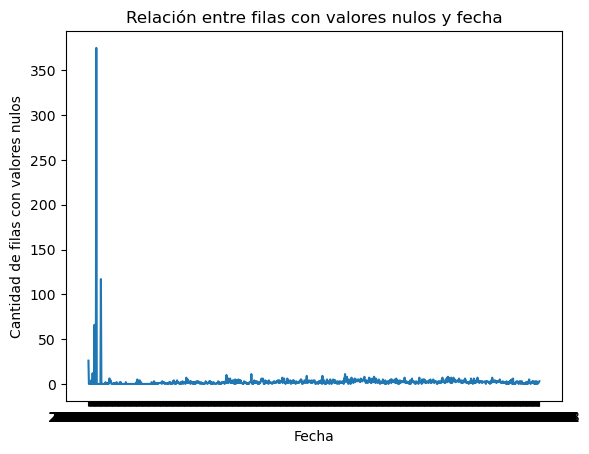

In [77]:
#lo mostramos en el grafico para verificar que los nulos provienen de los primeros cuestionarios, donde las preguntas eran abiertas

plt.plot(relacion_nan_fecha.index, relacion_nan_fecha.values)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de filas con valores nulos')
plt.title('Relación entre filas con valores nulos y fecha')
plt.show()

In [78]:
data_prior2['nan_filas'].max(), data_prior2['nan_filas'].min(), data_prior2['nan_filas'].mean()

(6, 0, 0.23469579958560935)

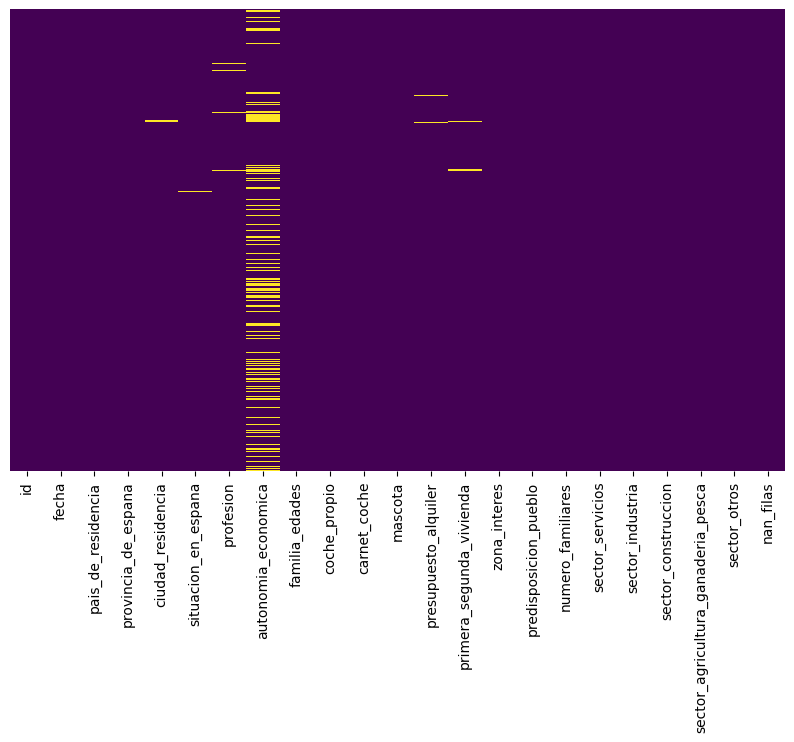

In [79]:
plt.figure(figsize=(10, 6))  

sns.heatmap(data_prior2.isna(),   
            yticklabels=False,
            cmap='viridis',
            cbar=False
           )

plt.show();

In [80]:
data_prior2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10618 entries, 0 to 10617
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   id                                  10618 non-null  object
 1   fecha                               10618 non-null  object
 2   pais_de_residencia                  10618 non-null  object
 3   provincia_de_espana                 10618 non-null  object
 4   ciudad_residencia                   10590 non-null  object
 5   situacion_en_espana                 10571 non-null  object
 6   profesion                           10515 non-null  object
 7   autonomia_economica                 8407 non-null   object
 8   familia_edades                      10618 non-null  object
 9   coche_propio                        10618 non-null  object
 10  carnet_coche                        10618 non-null  object
 11  mascota                             10618 non-null  ob

In [81]:
data_prior2.to_csv('../Proyecto_Arraigo_Recomender_System/data/Urbanitas_prior3.csv')

In [82]:
data_prior2.to_csv('../Proyecto_Arraigo_Recomender_System/data/copia_seguridad.csv')

In [83]:
porcentaje_nulos = data_prior2.isnull().sum() / data_prior2.count() * 100
porcentaje_nulos.sort_values(ascending=False)

autonomia_economica                   26.299512
profesion                              0.979553
primera_segunda_vivienda               0.587344
situacion_en_espana                    0.444613
presupuesto_alquiler                   0.387634
ciudad_residencia                      0.264400
id                                     0.000000
predisposicion_pueblo                  0.000000
sector_otros                           0.000000
sector_agricultura_ganaderia_pesca     0.000000
sector_construccion                    0.000000
sector_industria                       0.000000
sector_servicios                       0.000000
numero_familiares                      0.000000
mascota                                0.000000
zona_interes                           0.000000
fecha                                  0.000000
carnet_coche                           0.000000
coche_propio                           0.000000
familia_edades                         0.000000
provincia_de_espana                    0

In [84]:
#volvemos a poner en formato fecha la columna de fechas



data_prior2['fecha'] = pd.to_datetime(data_prior2['fecha'], format='%Y-%m-%d')

print(data_prior2['fecha'].dtype)


datetime64[ns]


In [85]:
#la columna ciudad, ha sido usada como columna de apoyo para poder rellenar los nulos de las columnas de país de residencia y provincia. Por tanto, como no es relevante para futuros análisis, la eliminaremos. 

data_prior2.drop('ciudad_residencia', axis=1, inplace=True)


In [86]:
#next steps: borrar las columnas con nulos + intentar crear un modelo de machine learning para rellenar la columna de autonomía económica